# Central Limit Theorem

The Central Limit Theorem states that when a large number of random samples is taken from any dataset, the sampling distribution of the dataset means will approach a normal distribution.

The task of the MP is to prove this theorem empirically through simulations, by editing and filling missing parts of this workbook.

Edit this markdown cell to show your group member's names.

Member 1

Member 2

Member 3

In [1]:
#IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

In [2]:
#DATASET GENERATION

# n = the number of values in the dataset to be generated
n = 100000

######################
# Put Your Code Here #
######################
# TODO:
# 1) Check numpy for the function calls for different dataset distributions.
# 2) Create data distributed in a uniform distribution from 0 to 1

lowerBound = 0
upperBound = 1
uniform_data = np.random.uniform(lowerBound, upperBound, n)


##################
#      End       #
##################

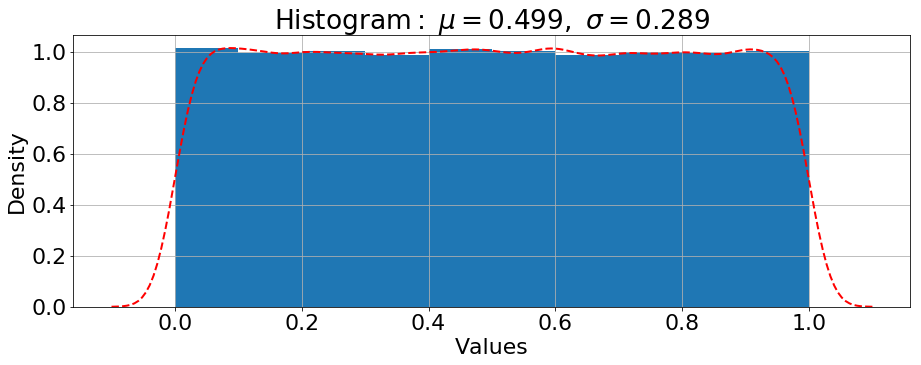

In [3]:
# HISTOGRAM VISUALIZATION - UNIFORM

data = uniform_data
a = lowerBound
b = upperBound

#visualize the histogram of the data
fig = plt.figure(figsize=(15,5))
num, bins, patches = plt.hist(data, 10,normed=True)

mean = np.mean(data);
stdev = np.std(data);

#add a line corresponding to the probability density function
density = gaussian_kde(data)
xs = np.linspace(a-0.1,b+0.1,200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


plt.show()

## Sanity Check 1:

What does the uniform distribution look like? What should it look like?

In [21]:
# SAMPLING FROM THE DATA
sample_size = 10
number_of_samples = 1000

######################
# Put Your Code Here #
######################
# TODO:
# 1) Take n=number_of_samples samples of size=sample_size from the generated dataset.
# 2) Populate the samples list with the data taken.


samples = np.zeros((number_of_samples, sample_size))
iterator = 0

                   
for x in range(number_of_samples):
    for y in range(sample_size):
        samples[x][y] = data[iter]
        iterator += 1

##################
#      End       #
##################

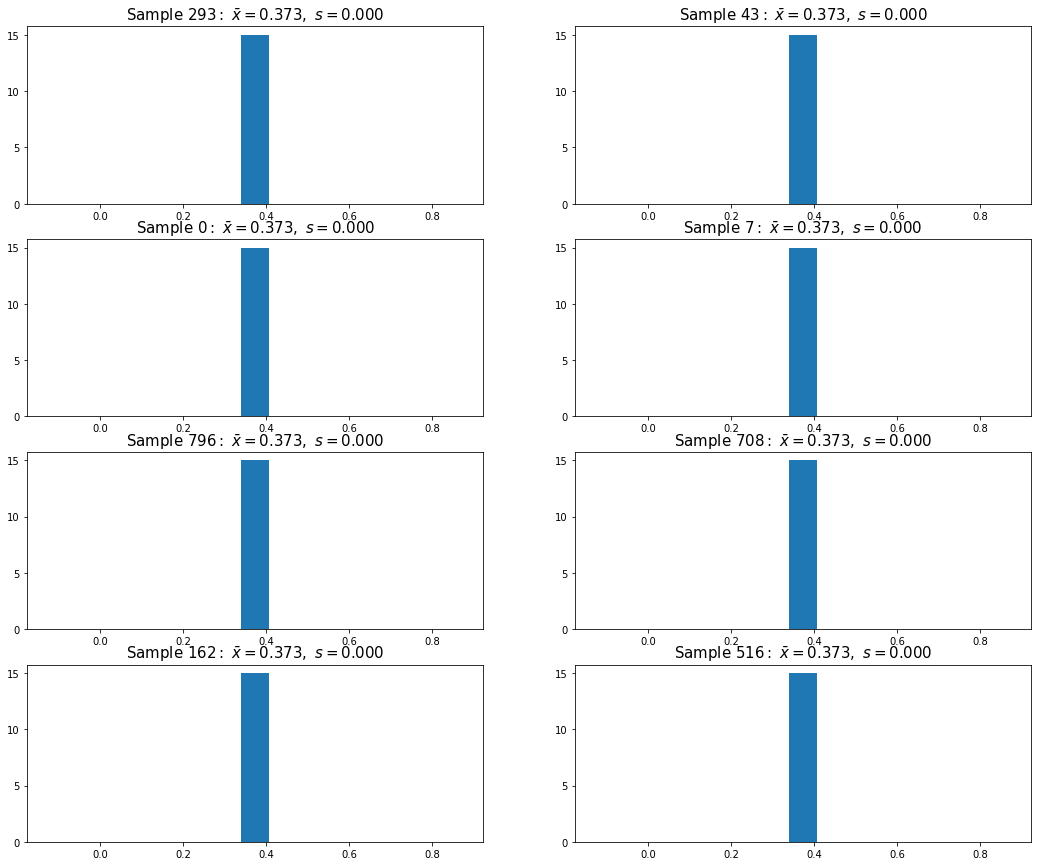

In [22]:
# PLOTTING A RANDOM 8 SAMPLES
# You can rerun this code for a different set of 8 samples from your dataset.

fig = plt.figure(figsize=(18,15))
ctr = 1

for i in np.random.choice(np.arange(number_of_samples),8):
    ax = plt.subplot(4,2,ctr)
    for j in (ax.get_xticklabels() + ax.get_yticklabels()):
        j.set_fontsize(10)
        
    
    plt.hist(samples[i,:], 15,normed=True)
    plt.title(r'$\mathrm{Sample\ %d:}\ \bar{x}=%.3f,\ s=%.3f$' %(i,np.mean(samples[i,:]), np.std(samples[i,:])))
    ax.title.set_fontsize(15)
    ctr = ctr + 1

In [21]:
# FINDING THE SAMPLING DISTRIBUTIION OF THE MEANS

######################
# Put Your Code Here #
######################
# TODO:
# 1) Create an array with the means of all the samples.
# 2) Find the mean and stdev of the sampling distribution array.

sample_means = samples.mean(axis=1)
sample_ave = np.mean(sample_means)
sample_stdev = np.std(sample_ave)



##################
#      End       #
##################

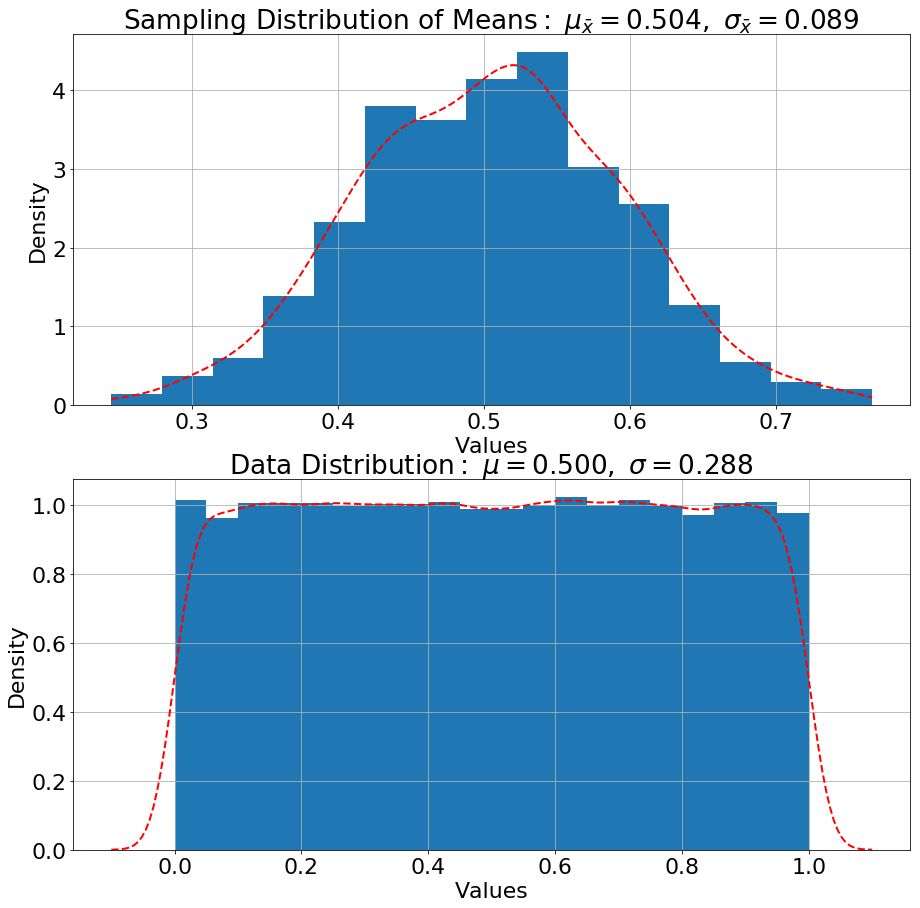

In [22]:
# PLOTTING THE SAMPLING DISTRIBUTION

fig = plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
n, bins, patches = plt.hist(sample_means, 15, normed=1)

sample_density = gaussian_kde(sample_means)
xs = np.linspace(np.min(sample_means),np.max(sample_means),200)

plt.plot(xs, sample_density(xs), 'r--',linewidth=2)

mu = sample_ave
sigma = sample_stdev

plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.title(r'$\mathrm{Sampling\ Distribution\ of\ Means:}\ \mu_\bar{x}=%.3f,\ \sigma_\bar{x}=%.3f$' %(mu, sigma))

plt.subplot(2,1,2)
num, bins, patches = plt.hist(data, 20,normed=True)
xs = np.linspace(a-0.1,b+0.1,200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Data\ Distribution:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


## Sanity Check 2:

The code we just created first plots the sampling distribution of 1000 samples of size 10, second, plots the data used in each sample. What should the first plot look like? What should the second plot look like?

The next step from here would be the final step for this distribution, simulating larger and larger sample sizes, and checking whether the Central Limit Theorem truly holds.

TypeError: 'NoneType' object is not iterable

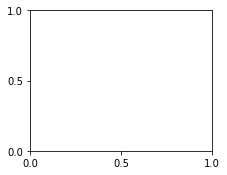

In [42]:
# CENTRAL LIMIT THEOREM SIMULATION

sample_size = 100
ctr = 1

fig = plt.figure(figsize=(15,15))

# For a range of a number of samples starting from 100 to 900, repeat the sampling means process:
for number_of_samples in range(100,900,40):

    ######################
    # Put Your Code Here #
    ######################
    # TODO:
    # 1) Fill the samples array.
    # 2) Get sample_means, the sampling distribution mean, and sampling distribution stdev.

    samples = None
    sample_means = None
    sample_ave = None
    sample_stdev = None

    ##################
    #      End       #
    ##################
    
    # Plotting code:
    ax = plt.subplot(5,4,ctr)
    for j in (ax.get_xticklabels() + ax.get_yticklabels()):
        j.set_fontsize(10)

    plt.hist(sample_means, 15,normed=True)
    plt.title(r'$\mathrm{Sample Size\ %d:}\ \mu_\bar{x}=%.3f,\ \sigma_\bar{x}=%.3f$' %(number_of_samples,sample_ave,sample_stdev))
    ax.title.set_fontsize(10)
        
    ctr += 1

## Sanity Check 3:

Warning: Depending on the computer running the code, the final simulation may take a bit of time (5-10min) to complete. 

Given the plotted graphs above, compare the first row of plots with the last row. Is there a difference? What are the main differences between the plots?

Is there a trend in the means/stdevs of each graph? Do the means/stdevs of the sampling distributions approach a specific number?

Does the Central Limit Theorem hold? Go back to the first set and try swapping out the uniform distribution with a beta distribution with a = 1 and b = 5. Does the Central Limit Theorem still hold?